# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [3]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [4]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [5]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [6]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a   -1.340066
b   -0.575629
c   -0.344332
d    0.232414
e    0.472194
dtype: float64
a         NaN
b   -1.151258
c   -0.688665
d    0.464827
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [7]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2022,11,30,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 30 2022'
# or alternatively
date = '30/11/2022 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2022-11-30
2022-11-30 10:45:10.000015
30/11/2022 10:45:00
DatetimeIndex(['2022-11-30 10:45:00', '2022-12-01 10:45:00',
               '2022-12-02 10:45:00', '2022-12-03 10:45:00',
               '2022-12-04 10:45:00', '2022-12-05 10:45:00',
               '2022-12-06 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 10:45:01',
               '2022-11-30 10:45:02', '2022-11-30 10:45:03',
               '2022-11-30 10:45:04', '2022-11-30 10:45:05',
               '2022-11-30 10:45:06', '2022-11-30 10:45:07',
               '2022-11-30 10:45:08', '2022-11-30 10:45:09',
               ...
               '2022-11-30 11:44:50', '2022-11-30 11:44:51',
               '2022-11-30 11:44:52', '2022-11-30 11:44:53',
               '2022-11-30 11:44:54', '2022-11-30 11:44:55',
               '2022-11-30 11:44:56', '2022-11-30 11:44:57',
               '2022-11-30 11:44:58', '2022-11-30 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [8]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 1970
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [9]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2022-11-30':'2022-12-01'], '\n') # Note - includes end time


2022-11-30 10:45:00     8.517338
2022-12-01 10:45:00    12.400858
2022-12-02 10:45:00    10.804352
2022-12-03 10:45:00     9.621276
Freq: D, dtype: float64 

2022-11-30 10:45:00     8.517338
2022-12-01 10:45:00    12.400858
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [10]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [11]:
entries=10
dates=pd.date_range('11/30/2022 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2022-11-30 10:45:00,-1.109780,0.813720,-0.309148,0.176039
2022-11-30 11:45:00,-0.646241,1.187708,-0.320631,0.846553
2022-11-30 12:45:00,0.228248,0.605995,-0.912445,0.224471
2022-11-30 13:45:00,0.190302,0.515795,0.060394,0.645407
2022-11-30 14:45:00,0.756360,0.659584,0.913701,-0.132362
2022-11-30 15:45:00,0.214038,-1.119247,0.222440,0.283105
2022-11-30 16:45:00,-0.745643,-0.041368,0.324111,-0.574775
2022-11-30 17:45:00,-0.470231,-0.178254,0.842607,-0.444233
2022-11-30 18:45:00,-0.507512,0.584736,0.713597,-0.687075
2022-11-30 19:45:00,0.916136,1.799454,-1.008548,-0.763247


or by means of a dictionary:


In [12]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [13]:
df.head(2)

,A,B,C,D
2022-11-30 10:45:00,-1.109780,0.813720,-0.309148,0.176039
2022-11-30 11:45:00,-0.646241,1.187708,-0.320631,0.846553


In [14]:
df.tail(4)

,A,B,C,D
2022-11-30 16:45:00,-0.745643,-0.041368,0.324111,-0.574775
2022-11-30 17:45:00,-0.470231,-0.178254,0.842607,-0.444233
2022-11-30 18:45:00,-0.507512,0.584736,0.713597,-0.687075
2022-11-30 19:45:00,0.916136,1.799454,-1.008548,-0.763247


In [15]:
df.index

DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 11:45:00',
               '2022-11-30 12:45:00', '2022-11-30 13:45:00',
               '2022-11-30 14:45:00', '2022-11-30 15:45:00',
               '2022-11-30 16:45:00', '2022-11-30 17:45:00',
               '2022-11-30 18:45:00', '2022-11-30 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[-1.10978031,  0.81372017, -0.30914793,  0.17603871],
       [-0.64624147,  1.18770765, -0.32063061,  0.84655254],
       [ 0.2282484 ,  0.6059952 , -0.91244509,  0.22447108],
       [ 0.19030226,  0.51579465,  0.06039434,  0.64540713],
       [ 0.75636018,  0.65958369,  0.91370066, -0.13236234],
       [ 0.2140382 , -1.11924664,  0.22244022,  0.28310464],
       [-0.7456427 , -0.04136776,  0.32411092, -0.57477513],
       [-0.47023144, -0.17825424,  0.84260687, -0.44423301],
       [-0.50751205,  0.58473605,  0.71359682, -0.68707503],
       [ 0.91613561,  1.79945399, -1.00854778, -0.76324665]])

In [18]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.117432,0.482812,0.052608,-0.042612
std,0.674250,0.794158,0.685781,0.565333
min,-1.109780,-1.119247,-1.008548,-0.763247
25%,-0.611559,0.097923,-0.317760,-0.542140
50%,-0.139965,0.595366,0.141417,0.021838
75%,0.224696,0.775186,0.616225,0.268446
max,0.916136,1.799454,0.913701,0.846553


In [19]:
df.T

,2022-11-30 10:45:00,2022-11-30 11:45:00,2022-11-30 12:45:00,2022-11-30 13:45:00,2022-11-30 14:45:00,2022-11-30 15:45:00,2022-11-30 16:45:00,2022-11-30 17:45:00,2022-11-30 18:45:00,2022-11-30 19:45:00
A,-1.109780,-0.646241,0.228248,0.190302,0.756360,0.214038,-0.745643,-0.470231,-0.507512,0.916136
B,0.813720,1.187708,0.605995,0.515795,0.659584,-1.119247,-0.041368,-0.178254,0.584736,1.799454
C,-0.309148,-0.320631,-0.912445,0.060394,0.913701,0.222440,0.324111,0.842607,0.713597,-1.008548
D,0.176039,0.846553,0.224471,0.645407,-0.132362,0.283105,-0.574775,-0.444233,-0.687075,-0.763247


In [20]:
df.sort_index(axis=0,ascending=True)

,A,B,C,D
2022-11-30 10:45:00,-1.109780,0.813720,-0.309148,0.176039
2022-11-30 11:45:00,-0.646241,1.187708,-0.320631,0.846553
2022-11-30 12:45:00,0.228248,0.605995,-0.912445,0.224471
2022-11-30 13:45:00,0.190302,0.515795,0.060394,0.645407
2022-11-30 14:45:00,0.756360,0.659584,0.913701,-0.132362
2022-11-30 15:45:00,0.214038,-1.119247,0.222440,0.283105
2022-11-30 16:45:00,-0.745643,-0.041368,0.324111,-0.574775
2022-11-30 17:45:00,-0.470231,-0.178254,0.842607,-0.444233
2022-11-30 18:45:00,-0.507512,0.584736,0.713597,-0.687075
2022-11-30 19:45:00,0.916136,1.799454,-1.008548,-0.763247


In [22]:
df.sort_values(by="C")

,A,B,C,D
2022-11-30 19:45:00,0.916136,1.799454,-1.008548,-0.763247
2022-11-30 12:45:00,0.228248,0.605995,-0.912445,0.224471
2022-11-30 11:45:00,-0.646241,1.187708,-0.320631,0.846553
2022-11-30 10:45:00,-1.109780,0.813720,-0.309148,0.176039
2022-11-30 13:45:00,0.190302,0.515795,0.060394,0.645407
2022-11-30 15:45:00,0.214038,-1.119247,0.222440,0.283105
2022-11-30 16:45:00,-0.745643,-0.041368,0.324111,-0.574775
2022-11-30 18:45:00,-0.507512,0.584736,0.713597,-0.687075
2022-11-30 17:45:00,-0.470231,-0.178254,0.842607,-0.444233
2022-11-30 14:45:00,0.756360,0.659584,0.913701,-0.132362


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [23]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2022-11-30 10:45:00   -1.109780
2022-11-30 11:45:00   -0.646241
2022-11-30 12:45:00    0.228248
2022-11-30 13:45:00    0.190302
2022-11-30 14:45:00    0.756360
2022-11-30 15:45:00    0.214038
2022-11-30 16:45:00   -0.745643
2022-11-30 17:45:00   -0.470231
2022-11-30 18:45:00   -0.507512
2022-11-30 19:45:00    0.916136
Freq: H, Name: A, dtype: float64 

2022-11-30 10:45:00   -1.109780
2022-11-30 11:45:00   -0.646241
2022-11-30 12:45:00    0.228248
2022-11-30 13:45:00    0.190302
2022-11-30 14:45:00    0.756360
2022-11-30 15:45:00    0.214038
2022-11-30 16:45:00   -0.745643
2022-11-30 17:45:00   -0.470231
2022-11-30 18:45:00   -0.507512
2022-11-30 19:45:00    0.916136
Freq: H, Name: A, dtype: float64


In [24]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2022-11-30 10:45:00":"2022-11-30 12:45:00"])

                            A         B         C         D
2022-11-30 10:45:00 -1.109780  0.813720 -0.309148  0.176039
2022-11-30 11:45:00 -0.646241  1.187708 -0.320631  0.846553
2022-11-30 12:45:00  0.228248  0.605995 -0.912445  0.224471
                            A         B         C         D
2022-11-30 10:45:00 -1.109780  0.813720 -0.309148  0.176039
2022-11-30 11:45:00 -0.646241  1.187708 -0.320631  0.846553
2022-11-30 12:45:00  0.228248  0.605995 -0.912445  0.224471


### Selection by label

In [25]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -1.109780
B    0.813720
C   -0.309148
D    0.176039
Name: 2022-11-30 10:45:00, dtype: float64

In [26]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2022-11-30 10:45:00,-1.109780,0.813720
2022-11-30 11:45:00,-0.646241,1.187708
2022-11-30 12:45:00,0.228248,0.605995
2022-11-30 13:45:00,0.190302,0.515795
2022-11-30 14:45:00,0.756360,0.659584
2022-11-30 15:45:00,0.214038,-1.119247
2022-11-30 16:45:00,-0.745643,-0.041368
2022-11-30 17:45:00,-0.470231,-0.178254
2022-11-30 18:45:00,-0.507512,0.584736
2022-11-30 19:45:00,0.916136,1.799454


In [27]:
# showing label slicing, both endpoints are included:
df.loc['2022-11-30 14:45:00':'2022-11-30 16:45:00',['A','B']]

,A,B
2022-11-30 14:45:00,0.756360,0.659584
2022-11-30 15:45:00,0.214038,-1.119247
2022-11-30 16:45:00,-0.745643,-0.041368


In [28]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.6462414690685496
-0.6462414690685496


### Selecting by position

In [29]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.190302
B    0.515795
C    0.060394
D    0.645407
Name: 2022-11-30 13:45:00, dtype: float64 

                            A         B
2022-11-30 13:45:00  0.190302  0.515795
2022-11-30 14:45:00  0.756360  0.659584


In [30]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2022-11-30 11:45:00,-0.646241,-0.320631
2022-11-30 12:45:00,0.228248,-0.912445
2022-11-30 14:45:00,0.756360,0.913701


In [31]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2022-11-30 11:45:00 -0.646241  1.187708 -0.320631  0.846553
2022-11-30 12:45:00  0.228248  0.605995 -0.912445  0.224471 

                            B         C
2022-11-30 10:45:00  0.813720 -0.309148
2022-11-30 11:45:00  1.187708 -0.320631
2022-11-30 12:45:00  0.605995 -0.912445
2022-11-30 13:45:00  0.515795  0.060394
2022-11-30 14:45:00  0.659584  0.913701
2022-11-30 15:45:00 -1.119247  0.222440
2022-11-30 16:45:00 -0.041368  0.324111
2022-11-30 17:45:00 -0.178254  0.842607
2022-11-30 18:45:00  0.584736  0.713597
2022-11-30 19:45:00  1.799454 -1.008548


In [ ]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [32]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2022-11-30 10:45:00,-1.109780,0.813720,-0.309148,0.176039
2022-11-30 11:45:00,-0.646241,1.187708,-0.320631,0.846553
2022-11-30 12:45:00,0.228248,0.605995,-0.912445,0.224471
2022-11-30 13:45:00,0.190302,0.515795,0.060394,0.645407
2022-11-30 14:45:00,0.756360,0.659584,0.913701,-0.132362
2022-11-30 18:45:00,-0.507512,0.584736,0.713597,-0.687075
2022-11-30 19:45:00,0.916136,1.799454,-1.008548,-0.763247


In [33]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2022-11-30 10:45:00,NaN,0.813720,NaN,0.176039
2022-11-30 11:45:00,NaN,1.187708,NaN,0.846553
2022-11-30 12:45:00,0.228248,0.605995,NaN,0.224471
2022-11-30 13:45:00,0.190302,0.515795,0.060394,0.645407
2022-11-30 14:45:00,0.756360,0.659584,0.913701,NaN
2022-11-30 15:45:00,0.214038,NaN,0.222440,0.283105
2022-11-30 16:45:00,NaN,NaN,0.324111,NaN
2022-11-30 17:45:00,NaN,NaN,0.842607,NaN
2022-11-30 18:45:00,NaN,0.584736,0.713597,NaN
2022-11-30 19:45:00,0.916136,1.799454,NaN,NaN


### Setting

Combination of selection and setting of values

In [34]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [35]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.813720,-0.309148,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.646241,1.187708,-0.320631,5,0.5,2,0.999962
2022-11-30 12:45:00,0.228248,0.605995,-0.912445,5,1.0,4,0.999848
2022-11-30 13:45:00,0.190302,0.515795,0.060394,5,1.5,6,0.999657
2022-11-30 14:45:00,0.756360,0.659584,0.913701,5,2.0,8,0.999391
2022-11-30 15:45:00,0.214038,-1.119247,0.222440,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.745643,-0.041368,0.324111,5,3.0,12,0.998630
2022-11-30 17:45:00,-0.470231,-0.178254,0.842607,5,3.5,14,0.998135
2022-11-30 18:45:00,-0.507512,0.584736,0.713597,5,4.0,16,0.997564
2022-11-30 19:45:00,0.916136,1.799454,-1.008548,5,4.5,18,0.996917


In [36]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.813720,-0.309148,-5,0.0,0,-1.000000
2022-11-30 11:45:00,-0.646241,-1.187708,-0.320631,-5,-0.5,-2,-0.999962
2022-11-30 12:45:00,-0.228248,-0.605995,-0.912445,-5,-1.0,-4,-0.999848
2022-11-30 13:45:00,-0.190302,-0.515795,-0.060394,-5,-1.5,-6,-0.999657
2022-11-30 14:45:00,-0.756360,-0.659584,-0.913701,-5,-2.0,-8,-0.999391
2022-11-30 15:45:00,-0.214038,-1.119247,-0.222440,-5,-2.5,-10,-0.999048
2022-11-30 16:45:00,-0.745643,-0.041368,-0.324111,-5,-3.0,-12,-0.998630
2022-11-30 17:45:00,-0.470231,-0.178254,-0.842607,-5,-3.5,-14,-0.998135
2022-11-30 18:45:00,-0.507512,-0.584736,-0.713597,-5,-4.0,-16,-0.997564
2022-11-30 19:45:00,-0.916136,-1.799454,-1.008548,-5,-4.5,-18,-0.996917


In [37]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.813720,-0.309148,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.646241,1.187708,-0.320631,5,0.5,2,0.999962
2022-11-30 12:45:00,0.228248,0.605995,-0.912445,5,1.0,4,0.999848
2022-11-30 13:45:00,0.190302,0.515795,0.060394,5,1.5,6,0.999657
2022-11-30 14:45:00,0.756360,0.659584,0.913701,5,2.0,8,0.999391
2022-11-30 15:45:00,0.214038,-1.119247,0.222440,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.745643,-0.041368,0.324111,5,3.0,12,0.998630
2022-11-30 17:45:00,-0.470231,-0.178254,0.842607,5,3.5,14,0.998135
2022-11-30 18:45:00,-0.507512,0.584736,0.713597,5,4.0,16,0.997564
2022-11-30 19:45:00,0.916136,1.799454,-1.008548,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [38]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2022-11-30 10:45:00,0.000000,0.813720,-0.309148,5,0.0,1.000000
2022-11-30 11:45:00,-0.646241,1.187708,-0.320631,5,0.5,0.999962
2022-11-30 12:45:00,0.228248,0.605995,-0.912445,5,1.0,0.999848
2022-11-30 13:45:00,0.190302,0.515795,0.060394,5,1.5,0.999657
2022-11-30 14:45:00,0.756360,0.659584,0.913701,5,2.0,0.999391
2022-11-30 15:45:00,0.214038,-1.119247,0.222440,5,2.5,0.999048
2022-11-30 16:45:00,-0.745643,-0.041368,0.324111,5,3.0,0.998630
2022-11-30 17:45:00,-0.470231,-0.178254,0.842607,5,3.5,0.998135
2022-11-30 18:45:00,-0.507512,0.584736,0.713597,5,4.0,0.997564
2022-11-30 19:45:00,0.916136,1.799454,-1.008548,5,4.5,0.996917


In [39]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.813720,-0.309148,5,0.0,0,1.000000
2022-11-30 15:45:00,0.214038,-1.119247,0.222440,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.745643,-0.041368,0.324111,5,3.0,12,0.998630
2022-11-30 17:45:00,-0.470231,-0.178254,0.842607,5,3.5,14,0.998135
2022-11-30 18:45:00,-0.507512,0.584736,0.713597,5,4.0,16,0.997564
2022-11-30 19:45:00,0.916136,1.799454,-1.008548,5,4.5,18,0.996917


In [40]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.813720,-0.309148,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.646241,1.187708,-0.320631,5,0.5,2,0.999962
2022-11-30 12:45:00,0.228248,0.605995,-0.912445,5,1.0,4,0.999848
2022-11-30 13:45:00,0.190302,0.515795,0.060394,5,1.5,6,0.999657
2022-11-30 14:45:00,0.756360,0.659584,0.913701,5,2.0,8,0.999391
2022-11-30 15:45:00,0.214038,-1.119247,0.222440,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.745643,-0.041368,0.324111,5,3.0,12,0.998630
2022-11-30 17:45:00,-0.470231,-0.178254,0.842607,5,3.5,14,0.998135
2022-11-30 18:45:00,-0.507512,0.584736,0.713597,5,4.0,16,0.997564
2022-11-30 19:45:00,0.916136,1.799454,-1.008548,5,4.5,18,0.996917


In [41]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2022-11-30 18:45:00"))

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.813720,-0.309148,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.646241,1.187708,-0.320631,5,0.5,2,0.999962
2022-11-30 12:45:00,0.228248,0.605995,-0.912445,5,1.0,4,0.999848
2022-11-30 13:45:00,0.190302,0.515795,0.060394,5,1.5,6,0.999657
2022-11-30 14:45:00,0.756360,0.659584,0.913701,5,2.0,8,0.999391
2022-11-30 15:45:00,0.214038,-1.119247,0.222440,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.745643,-0.041368,0.324111,5,3.0,12,0.998630
2022-11-30 17:45:00,-0.470231,-0.178254,0.842607,5,3.5,14,0.998135
2022-11-30 19:45:00,0.916136,1.799454,-1.008548,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [42]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,NaN,0.813720,NaN,5,NaN,NaN,1.000000
2022-11-30 11:45:00,NaN,1.187708,NaN,5,0.5,2.0,0.999962
2022-11-30 12:45:00,0.228248,0.605995,NaN,5,1.0,4.0,0.999848
2022-11-30 13:45:00,0.190302,0.515795,0.060394,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.756360,0.659584,0.913701,5,2.0,8.0,0.999391
2022-11-30 15:45:00,0.214038,NaN,0.222440,5,2.5,10.0,0.999048
2022-11-30 16:45:00,NaN,NaN,0.324111,5,3.0,12.0,0.998630
2022-11-30 17:45:00,NaN,NaN,0.842607,5,3.5,14.0,0.998135
2022-11-30 18:45:00,NaN,0.584736,0.713597,5,4.0,16.0,0.997564
2022-11-30 19:45:00,0.916136,1.799454,NaN,5,4.5,18.0,0.996917


In [43]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2022-11-30 13:45:00,0.190302,0.515795,0.060394,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.756360,0.659584,0.913701,5,2.0,8.0,0.999391


In [44]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,True,False,True,False,True,True,False
2022-11-30 11:45:00,True,False,True,False,False,False,False
2022-11-30 12:45:00,False,False,True,False,False,False,False
2022-11-30 13:45:00,False,False,False,False,False,False,False
2022-11-30 14:45:00,False,False,False,False,False,False,False
2022-11-30 15:45:00,False,True,False,False,False,False,False
2022-11-30 16:45:00,True,True,False,False,False,False,False
2022-11-30 17:45:00,True,True,False,False,False,False,False
2022-11-30 18:45:00,True,False,False,False,False,False,False
2022-11-30 19:45:00,False,False,True,False,False,False,False


In [45]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.813720,0.000000,5,0.0,0.0,1.000000
2022-11-30 11:45:00,0.000000,1.187708,0.000000,5,0.5,2.0,0.999962
2022-11-30 12:45:00,0.228248,0.605995,0.000000,5,1.0,4.0,0.999848
2022-11-30 13:45:00,0.190302,0.515795,0.060394,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.756360,0.659584,0.913701,5,2.0,8.0,0.999391
2022-11-30 15:45:00,0.214038,0.000000,0.222440,5,2.5,10.0,0.999048
2022-11-30 16:45:00,0.000000,0.000000,0.324111,5,3.0,12.0,0.998630
2022-11-30 17:45:00,0.000000,0.000000,0.842607,5,3.5,14.0,0.998135
2022-11-30 18:45:00,0.000000,0.584736,0.713597,5,4.0,16.0,0.997564
2022-11-30 19:45:00,0.916136,1.799454,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [46]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,NaN,0.813720,NaN,5,NaN,NaN,1.000000
2022-11-30 11:45:00,NaN,1.187708,NaN,5,0.5,2.0,0.999962
2022-11-30 12:45:00,0.228248,0.605995,NaN,5,1.0,4.0,0.999848
2022-11-30 13:45:00,0.190302,0.515795,0.060394,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.756360,0.659584,0.913701,5,2.0,8.0,0.999391
2022-11-30 15:45:00,0.214038,0.659584,0.222440,5,2.5,10.0,0.999048
2022-11-30 16:45:00,0.214038,0.659584,0.324111,5,3.0,12.0,0.998630
2022-11-30 17:45:00,0.214038,0.659584,0.842607,5,3.5,14.0,0.998135
2022-11-30 18:45:00,0.214038,0.584736,0.713597,5,4.0,16.0,0.997564
2022-11-30 19:45:00,0.916136,1.799454,0.713597,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [47]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.006454
B          0.482812
C          0.052608
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2022-11-30 10:45:00    0.929225
2022-11-30 11:45:00    1.245828
2022-11-30 12:45:00    1.560235
2022-11-30 13:45:00    2.038021
2022-11-30 14:45:00    2.618434
2022-11-30 15:45:00    2.545183
2022-11-30 16:45:00    2.933676
2022-11-30 17:45:00    3.384608
2022-11-30 18:45:00    3.826912
2022-11-30 19:45:00    4.314851
Freq: H, dtype: float64 



In [48]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.813720,-0.309148,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.646241,2.001428,-0.629779,10,0.5,2,1.999962
2022-11-30 12:45:00,-0.417993,2.607423,-1.542224,15,1.5,6,2.999810
2022-11-30 13:45:00,-0.227691,3.123218,-1.481829,20,3.0,12,3.999467
2022-11-30 14:45:00,0.528669,3.782801,-0.568129,25,5.0,20,4.998858
2022-11-30 15:45:00,0.742708,2.663555,-0.345688,30,7.5,30,5.997906
2022-11-30 16:45:00,-0.002935,2.622187,-0.021577,35,10.5,42,6.996536
2022-11-30 17:45:00,-0.473167,2.443933,0.821029,40,14.0,56,7.994670
2022-11-30 18:45:00,-0.980679,3.028669,1.534626,45,18.0,72,8.992234
2022-11-30 19:45:00,-0.064543,4.828123,0.526078,50,22.5,90,9.989152


In [49]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.813720,-0.309148,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.646241,1.187708,-0.320631,5,0.5,2,0.999962
2022-11-30 12:45:00,0.228248,0.605995,-0.912445,5,1.0,4,0.999848
2022-11-30 13:45:00,0.190302,0.515795,0.060394,5,1.5,6,0.999657
2022-11-30 14:45:00,0.756360,0.659584,0.913701,5,2.0,8,0.999391
2022-11-30 15:45:00,0.214038,-1.119247,0.222440,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.745643,-0.041368,0.324111,5,3.0,12,0.998630
2022-11-30 17:45:00,-0.470231,-0.178254,0.842607,5,3.5,14,0.998135
2022-11-30 18:45:00,-0.507512,0.584736,0.713597,5,4.0,16,0.997564
2022-11-30 19:45:00,0.916136,1.799454,-1.008548,5,4.5,18,0.996917


In [50]:
df.apply(lambda x: x.max() - x.min())

A           1.661778
B           2.918701
C           1.922248
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [51]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2022-11-30 10:45:00    0.813720
2022-11-30 11:45:00    0.541466
2022-11-30 12:45:00    0.834244
2022-11-30 13:45:00    0.706097
2022-11-30 14:45:00    1.415944
2022-11-30 15:45:00   -0.905208
2022-11-30 16:45:00   -0.787010
2022-11-30 17:45:00   -0.648486
2022-11-30 18:45:00    0.077224
2022-11-30 19:45:00    2.715590
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [53]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [54]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [55]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [56]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [57]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.439270,-0.627840,-0.519824,-0.157279
1,0.101907,-2.135643,-2.742152,-0.692963
2,1.882683,0.404685,0.002541,-0.376145
3,-0.267372,-1.555333,-1.309535,-0.695523
4,0.235304,-0.462405,0.195058,2.535656
5,2.633822,1.034761,0.457170,0.516958
6,-0.318812,-2.399317,-0.838457,0.613556
7,-0.923246,0.477962,-1.713788,0.157231
8,-0.610714,-0.372256,-0.964441,-1.476910
9,-1.702936,-0.980785,0.314191,-0.316465


In [58]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.439270 -0.627840 -0.519824 -0.157279
 1  0.101907 -2.135643 -2.742152 -0.692963
 2  1.882683  0.404685  0.002541 -0.376145,
           0         1         2         3
 3 -0.267372 -1.555333 -1.309535 -0.695523
 4  0.235304 -0.462405  0.195058  2.535656
 5  2.633822  1.034761  0.457170  0.516958
 6 -0.318812 -2.399317 -0.838457  0.613556,
           0         1         2         3
 7 -0.923246  0.477962 -1.713788  0.157231
 8 -0.610714 -0.372256 -0.964441 -1.476910
 9 -1.702936 -0.980785  0.314191 -0.316465]

In [59]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.439270,-0.627840,-0.519824,-0.157279
1,0.101907,-2.135643,-2.742152,-0.692963
2,1.882683,0.404685,0.002541,-0.376145
3,-0.267372,-1.555333,-1.309535,-0.695523
4,0.235304,-0.462405,0.195058,2.535656
5,2.633822,1.034761,0.457170,0.516958
6,-0.318812,-2.399317,-0.838457,0.613556
7,-0.923246,0.477962,-1.713788,0.157231
8,-0.610714,-0.372256,-0.964441,-1.476910
9,-1.702936,-0.980785,0.314191,-0.316465


In [60]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,0.439270,-0.627840,-0.519824,-0.157279
1,0.101907,-2.135643,-2.742152,-0.692963
2,1.882683,0.404685,0.002541,-0.376145
3,-0.267372,-1.555333,-1.309535,-0.695523
4,0.235304,-0.462405,0.195058,2.535656
5,2.633822,1.034761,0.457170,0.516958
6,-0.318812,-2.399317,-0.838457,0.613556
7,-0.923246,0.477962,-1.713788,0.157231
8,-0.610714,-0.372256,-0.964441,-1.476910
9,-1.702936,-0.980785,0.314191,-0.316465


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [61]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [62]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.593023,-0.131697
1,bar,one,-1.721295,-0.091565
2,foo,two,-0.151670,-1.712802
3,bar,three,0.455828,0.361181
4,foo,two,-0.324931,0.524704
5,bar,two,0.380154,-1.081691
6,foo,one,0.910905,-0.679716
7,foo,three,0.548661,1.605870


In [63]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-0.885313,-0.812075
foo,1.575987,-0.393641


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [64]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.705860
       two       0.622381
baz    one       0.208525
       two      -0.157946
foo    one       0.173570
       two       1.289190
qux    one      -0.090349
       two      -0.706315
dtype: float64


In [65]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.721295 -0.091565
    three  0.455828  0.361181
    two    0.380154 -1.081691
foo one    1.503927 -0.811413
    three  0.548661  1.605870
    two   -0.476601 -1.188098

In [66]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -1.721295
            D   -0.091565
     three  C    0.455828
            D    0.361181
     two    C    0.380154
            D   -1.081691
foo  one    C    1.503927
            D   -0.811413
     three  C    0.548661
            D    1.605870
     two    C   -0.476601
            D   -1.188098
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

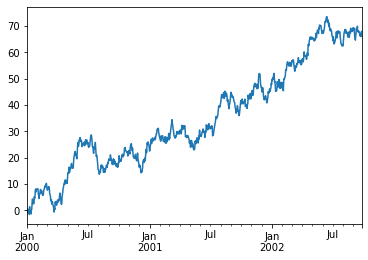

In [67]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

In [ ]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')